# Get the data

In [1]:
import pandas as pd

In [2]:
# Downloaded from https://figshare.com/articles/dataset/Untitled_Item/5513449
page_df = pd.read_csv('country/data/page_data.csv')

In [3]:
page_df.columns

Index(['page', 'country', 'rev_id'], dtype='object')

In [4]:
page_df

,page,country,rev_id
0,Template:ZambiaProvincialMinisters,Zambia,235107991
1,Bir I of Kanem,Chad,355319463
2,Template:Zimbabwe-politician-stub,Zimbabwe,391862046
3,Template:Uganda-politician-stub,Uganda,391862070
4,Template:Namibia-politician-stub,Namibia,391862409
...,...,...,...
47192,Yahya Jammeh,Gambia,807482007
47193,Lucius Fairchild,United States,807483006
47194,Fahd of Saudi Arabia,Saudi Arabia,807483153
47195,Francis Fessenden,United States,807483270


In [5]:
pop_df = pd.read_csv('WPDS_2020_data.csv')

In [6]:
pop_df#.columns

,FIPS,Name,Type,TimeFrame,Data (M),Population
0,WORLD,WORLD,World,2019,7772.850,7772850000
1,AFRICA,AFRICA,Sub-Region,2019,1337.918,1337918000
2,NORTHERN AFRICA,NORTHERN AFRICA,Sub-Region,2019,244.344,244344000
3,DZ,Algeria,Country,2019,44.357,44357000
4,EG,Egypt,Country,2019,100.803,100803000
...,...,...,...,...,...,...
229,WS,Samoa,Country,2019,0.200,200000
230,SB,Solomon Islands,Country,2019,0.715,715000
231,TO,Tonga,Country,2019,0.099,99000
232,TV,Tuvalu,Country,2019,0.010,10000


In [7]:
pop_df

,FIPS,Name,Type,TimeFrame,Data (M),Population
0,WORLD,WORLD,World,2019,7772.850,7772850000
1,AFRICA,AFRICA,Sub-Region,2019,1337.918,1337918000
2,NORTHERN AFRICA,NORTHERN AFRICA,Sub-Region,2019,244.344,244344000
3,DZ,Algeria,Country,2019,44.357,44357000
4,EG,Egypt,Country,2019,100.803,100803000
...,...,...,...,...,...,...
229,WS,Samoa,Country,2019,0.200,200000
230,SB,Solomon Islands,Country,2019,0.715,715000
231,TO,Tonga,Country,2019,0.099,99000
232,TV,Tuvalu,Country,2019,0.010,10000


# Clean the data

- Ignore articles with names beginning with 'Template:'
- Set aside regional populations (names in all CAPS)

In [8]:
page_df = page_df[~page_df['page'].str.startswith('Template:')]
page_df

,page,country,rev_id
1,Bir I of Kanem,Chad,355319463
10,Information Minister of the Palestinian Nation...,Palestinian Territory,393276188
12,Yos Por,Cambodia,393822005
23,Julius Gregr,Czech Republic,395521877
24,Edvard Gregr,Czech Republic,395526568
...,...,...,...
47192,Yahya Jammeh,Gambia,807482007
47193,Lucius Fairchild,United States,807483006
47194,Fahd of Saudi Arabia,Saudi Arabia,807483153
47195,Francis Fessenden,United States,807483270


In [9]:
region_pop_df = pop_df[(pop_df['FIPS'].str.len() > 2) & (pop_df['FIPS'].str.isupper())]
region_pop_df

,FIPS,Name,Type,TimeFrame,Data (M),Population
0,WORLD,WORLD,World,2019,7772.850,7772850000
1,AFRICA,AFRICA,Sub-Region,2019,1337.918,1337918000
2,NORTHERN AFRICA,NORTHERN AFRICA,Sub-Region,2019,244.344,244344000
10,WESTERN AFRICA,WESTERN AFRICA,Sub-Region,2019,401.115,401115000
27,EASTERN AFRICA,EASTERN AFRICA,Sub-Region,2019,444.970,444970000
48,MIDDLE AFRICA,MIDDLE AFRICA,Sub-Region,2019,179.757,179757000
58,SOUTHERN AFRICA,SOUTHERN AFRICA,Sub-Region,2019,67.732,67732000
64,NORTHERN AMERICA,NORTHERN AMERICA,Sub-Region,2019,368.193,368193000
67,LATIN AMERICA AND THE CARIBBEAN,LATIN AMERICA AND THE CARIBBEAN,Sub-Region,2019,651.036,651036000
68,CENTRAL AMERICA,CENTRAL AMERICA,Sub-Region,2019,178.611,178611000


In [10]:
country_pop_df = pop_df[~(pop_df['Name'].str.isupper())]
country_pop_df

,FIPS,Name,Type,TimeFrame,Data (M),Population
3,DZ,Algeria,Country,2019,44.357,44357000
4,EG,Egypt,Country,2019,100.803,100803000
5,LY,Libya,Country,2019,6.891,6891000
6,MA,Morocco,Country,2019,35.952,35952000
7,SD,Sudan,Country,2019,43.849,43849000
...,...,...,...,...,...,...
229,WS,Samoa,Country,2019,0.200,200000
230,SB,Solomon Islands,Country,2019,0.715,715000
231,TO,Tonga,Country,2019,0.099,99000
232,TV,Tuvalu,Country,2019,0.010,10000


In [11]:
region_to_country_dict = {'NORTHERN AFRICA':['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia', 'Western Sahara'],
                          'WESTERN AFRICA':['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia',
                                            'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania',
                                            'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo'],
                          'EASTERN AFRICA':['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 
                                            'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Reunion', 
                                            'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda',
                                            'Zambia', 'Zimbabwe'],
                          'MIDDLE AFRICA':['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo', 
                                           'Congo, Dem. Rep.', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe'],
                          'SOUTHERN AFRICA':['Botswana', 'eSwatini', 'Lesotho', 'Namibia', 'South Africa'],
                          'NORTHERN AMERICA':['Canada', 'United States'],
                          'CENTRAL AMERICA':['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico',
                                             'Nicaragua', 'Panama'],
                          'CARIBBEAN':['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 'Curacao', 'Dominica',
                                       'Dominican Republic', 'Grenada', 'Guadeloupe', 'Haiti', 'Jamaica', 'Martinique', 
                                       'Puerto Rico', 'St. Kitts-Nevis', 'Saint Lucia', 'St. Vincent and the Grenadines',
                                       'Trinidad and Tobago'],
                          'SOUTH AMERICA':['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 
                                           'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 
                                           'Venezuela'],
                          'WESTERN ASIA':['Armenia', 'Azerbaijan', 'Bahrain', 'Cyprus', 'Georgia', 'Iraq', 'Israel', 
                                          'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestinian Territory', 'Qatar', 
                                          'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen'],
                          'CENTRAL ASIA':['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'],
                          'SOUTH ASIA':['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Iran', 'Maldives', 'Nepal',
                                        'Pakistan', 'Sri Lanka'],
                          'SOUTHEAST ASIA':['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 
                                            'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam'],
                          'EAST ASIA':['China', 'China, Hong Kong SAR', 'China, Macao SAR', 'Japan', 'Korea, North',
                                       'Korea, South', 'Mongolia', 'Taiwan'],
                          'NORTHERN EUROPE':['Channel Islands', 'Denmark', 'Estonia', 'Finland', 'Iceland', 'Ireland',
                                             'Latvia', 'Lithuania', 'Norway', 'Sweden', 'United Kingdom'],
                          'WESTERN EUROPE':['Austria', 'Belgium', 'France', 'Germany', 'Liechtenstein', 'Luxembourg',
                                            'Monaco', 'Netherlands', 'Switzerland'],
                          'EASTERN EUROPE':['Belarus', 'Bulgaria', 'Czechia', 'Hungary', 'Moldova', 'Poland', 
                                            'Romania', 'Russia', 'Slovakia', 'Ukraine'],
                          'SOUTHERN EUROPE':['Albania', 'Andorra', 'Bosnia-Herzegovina', 'Croatia', 'Greece', 'Italy',
                                             'Kosovo', 'Malta', 'Montenegro', 'North Macedonia', 'Portugal', 
                                             'San Marino', 'Serbia', 'Slovenia', 'Spain'],
                          'OCEANIA':['Australia', 'Federated States of Micronesia', 'Fiji', 'French Polynesia', 
                                     'Guam', 'Kiribati', 'Marshall Islands', 'Nauru', 'New Caledonia', 'New Zealand',
                                     'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 
                                     'Vanuatu']
                         }

In [12]:
region_to_region_dict = {'AFRICA': region_to_country_dict['NORTHERN AFRICA'] +
                                   region_to_country_dict['WESTERN AFRICA'] + 
                                   region_to_country_dict['EASTERN AFRICA'] +
                                   region_to_country_dict['MIDDLE AFRICA'] +
                                   region_to_country_dict['SOUTHERN AFRICA'],
                         'LATIN AMERICA AND THE CARIBBEAN': region_to_country_dict['CENTRAL AMERICA'] +
                                                            region_to_country_dict['CARIBBEAN'] +
                                                            region_to_country_dict['SOUTH AMERICA'],
                         'ASIA': region_to_country_dict['WESTERN ASIA'] + 
                                 region_to_country_dict['CENTRAL ASIA'] + 
                                 region_to_country_dict['SOUTH ASIA'] + 
                                 region_to_country_dict['SOUTHEAST ASIA'] +
                                 region_to_country_dict['EAST ASIA'],
                         'EUROPE': region_to_country_dict['NORTHERN EUROPE'] +
                                   region_to_country_dict['WESTERN EUROPE'] + 
                                   region_to_country_dict['EASTERN EUROPE'] +
                                   region_to_country_dict['SOUTHERN EUROPE']
                        }

# Get page quality predictions from ORES

In [13]:
import json
import requests

In [14]:
def api_call(endpoint, parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    return response

In [15]:
endpoint_ores = 'https://ores.wikimedia.org/v3/scores/enwiki/?models=articlequality&revids={rev_id}'
model = 'articlequality'

headers = {
    'User-Agent': 'https://github.com/castlea',
    'From': 'caleona@uw.edu'
}

In [16]:
preds_df = pd.DataFrame(columns=['revid', 'prediction'])
could_not_score = pd.DataFrame(columns=['revid', 'message'])

print("Progress counter:")
for x in range(0, page_df.shape[0], 50):
    if x%5000 == 0:
        print(x)
    revids_to_score = page_df.iloc[x:x+50, 2]
    batch_of_50 = api_call(endpoint_ores, {"rev_id": "|".join(list(str(x) for x in revids_to_score))})
    
    for revid in revids_to_score:
        if 'error' not in batch_of_50['enwiki']['scores'][str(revid)]['articlequality'].keys():
            preds_df = preds_df.append({'revid': revid, 'prediction': batch_of_50['enwiki']['scores'][str(revid)]['articlequality']['score']['prediction']}, ignore_index = True)
        else:
            could_not_score = could_not_score.append({'revid':str(revid), 'message':batch_of_50['enwiki']['scores'][str(revid)]['articlequality']['error']}, ignore_index = True)
            

Progress counter:
0
5000
10000
15000
20000
25000
30000
35000
40000
45000


In [17]:
could_not_score

,revid,message
0,516633096,{'message': 'RevisionNotFound: Could not find ...
1,550682925,{'message': 'RevisionNotFound: Could not find ...
2,627547024,{'message': 'RevisionNotFound: Could not find ...
3,636911471,{'message': 'RevisionNotFound: Could not find ...
4,669987106,{'message': 'RevisionNotFound: Could not find ...
...,...,...
271,807336308,{'message': 'RevisionNotFound: Could not find ...
272,807367030,{'message': 'RevisionNotFound: Could not find ...
273,807367166,{'message': 'RevisionNotFound: Could not find ...
274,807479587,{'message': 'RevisionNotFound: Could not find ...


In [18]:
# write dataframe of pages that weren't scored
could_not_score.to_csv('wp_wpds_pages_no_score.csv')

# Combine datasets

In [19]:
scored_pages = preds_df.merge(page_df, left_on='revid', right_on='rev_id', how='left').drop(columns=['rev_id'])
scored_pages = scored_pages[['country', 'page', 'revid', 'prediction']]

In [20]:
final_df = scored_pages.merge(pop_df[['Name', 'Population']], left_on='country', right_on='Name', how='inner').drop(columns=['Name'])
final_df.columns = ['country', 'article_name', 'revision_id', 'article_quality_est', 'population']
final_df

,country,article_name,revision_id,article_quality_est,population
0,Chad,Bir I of Kanem,355319463,Stub,16877000
1,Chad,Abdullah II of Kanem,498683267,Stub,16877000
2,Chad,Salmama II of Kanem,565745353,Stub,16877000
3,Chad,Kuri I of Kanem,565745365,Stub,16877000
4,Chad,Mohammed I of Kanem,565745375,Stub,16877000
...,...,...,...,...,...
44563,Seychelles,Rita Sinon,800323154,Stub,98000
44564,Seychelles,Sylvette Frichot,800323798,Stub,98000
44565,Seychelles,May De Silva,800969960,Start,98000
44566,Seychelles,Vincent Meriton,802051093,Stub,98000


In [21]:
final_df.to_csv('wp_wpds_politicians_by_country.csv')

In [22]:
could_not_join = scored_pages.merge(pop_df[['Name', 'Population']], left_on='country', right_on='Name', how='outer')
could_not_join = could_not_join[(could_not_join['country'].isnull()) | (could_not_join['Name'].isnull())]
could_not_join

,country,page,revid,prediction,Name,Population
488,Czech Republic,Julius Gregr,395521877,Stub,NaN,NaN
489,Czech Republic,Edvard Gregr,395526568,Stub,NaN,NaN
490,Czech Republic,Miroslav Poche,672862914,Stub,NaN,NaN
491,Czech Republic,Vojtěch Mynář,673008587,Stub,NaN,NaN
492,Czech Republic,Jan Malypetr,704424304,Stub,NaN,NaN
...,...,...,...,...,...,...
46471,NaN,NaN,NaN,NaN,French Polynesia,280000.0
46472,NaN,NaN,NaN,NaN,Guam,175000.0
46473,NaN,NaN,NaN,NaN,New Caledonia,295000.0
46474,NaN,NaN,NaN,NaN,Palau,18000.0


In [23]:
could_not_join.to_csv('wp_wpds_countries-no_match.csv')

# Analysis

In [24]:
df = pd.read_csv('wp_wpds_politicians_by_country.csv').drop('Unnamed: 0', axis = 1)
df['sub-region'] = ''
df['region'] = ''
df

,country,article_name,revision_id,article_quality_est,population,sub-region,region
0,Chad,Bir I of Kanem,355319463,Stub,16877000,,
1,Chad,Abdullah II of Kanem,498683267,Stub,16877000,,
2,Chad,Salmama II of Kanem,565745353,Stub,16877000,,
3,Chad,Kuri I of Kanem,565745365,Stub,16877000,,
4,Chad,Mohammed I of Kanem,565745375,Stub,16877000,,
...,...,...,...,...,...,...,...
44563,Seychelles,Rita Sinon,800323154,Stub,98000,,
44564,Seychelles,Sylvette Frichot,800323798,Stub,98000,,
44565,Seychelles,May De Silva,800969960,Start,98000,,
44566,Seychelles,Vincent Meriton,802051093,Stub,98000,,


In [25]:
for key in region_to_country_dict.keys():
    df.loc[df['country'].isin(region_to_country_dict[key]), 'sub-region'] = key
df

,country,article_name,revision_id,article_quality_est,population,sub-region,region
0,Chad,Bir I of Kanem,355319463,Stub,16877000,MIDDLE AFRICA,
1,Chad,Abdullah II of Kanem,498683267,Stub,16877000,MIDDLE AFRICA,
2,Chad,Salmama II of Kanem,565745353,Stub,16877000,MIDDLE AFRICA,
3,Chad,Kuri I of Kanem,565745365,Stub,16877000,MIDDLE AFRICA,
4,Chad,Mohammed I of Kanem,565745375,Stub,16877000,MIDDLE AFRICA,
...,...,...,...,...,...,...,...
44563,Seychelles,Rita Sinon,800323154,Stub,98000,EASTERN AFRICA,
44564,Seychelles,Sylvette Frichot,800323798,Stub,98000,EASTERN AFRICA,
44565,Seychelles,May De Silva,800969960,Start,98000,EASTERN AFRICA,
44566,Seychelles,Vincent Meriton,802051093,Stub,98000,EASTERN AFRICA,


In [26]:
for key in region_to_region_dict.keys():
    df.loc[df['country'].isin(region_to_region_dict[key]), 'region'] = key
df

,country,article_name,revision_id,article_quality_est,population,sub-region,region
0,Chad,Bir I of Kanem,355319463,Stub,16877000,MIDDLE AFRICA,AFRICA
1,Chad,Abdullah II of Kanem,498683267,Stub,16877000,MIDDLE AFRICA,AFRICA
2,Chad,Salmama II of Kanem,565745353,Stub,16877000,MIDDLE AFRICA,AFRICA
3,Chad,Kuri I of Kanem,565745365,Stub,16877000,MIDDLE AFRICA,AFRICA
4,Chad,Mohammed I of Kanem,565745375,Stub,16877000,MIDDLE AFRICA,AFRICA
...,...,...,...,...,...,...,...
44563,Seychelles,Rita Sinon,800323154,Stub,98000,EASTERN AFRICA,AFRICA
44564,Seychelles,Sylvette Frichot,800323798,Stub,98000,EASTERN AFRICA,AFRICA
44565,Seychelles,May De Silva,800969960,Start,98000,EASTERN AFRICA,AFRICA
44566,Seychelles,Vincent Meriton,802051093,Stub,98000,EASTERN AFRICA,AFRICA


In [27]:
per_country = df[['country', 'population', 'revision_id']]
per_country = per_country.groupby(['country']).agg(article_count=('revision_id','count'), population=('population','sum')).reset_index()
per_country['proportion_to_pop'] = per_country['article_count']/per_country['population']

quality = df[['country', 'article_quality_est']][df['article_quality_est'].isin(['FA', 'GA'])].groupby('country').agg(high_quality_count=('article_quality_est', 'count')).reset_index()
per_country = per_country.merge(quality, on='country')
per_country['proportion_high_quality'] = per_country['high_quality_count']/per_country['article_count']

per_country

,country,article_count,population,proportion_to_pop,high_quality_count,proportion_high_quality
0,Afghanistan,319,12418032000,2.568845e-08,13,0.040752
1,Albania,456,1294128000,3.523608e-07,3,0.006579
2,Algeria,116,5145412000,2.254436e-08,2,0.017241
3,Argentina,491,22280107000,2.203760e-08,16,0.032587
4,Armenia,193,570508000,3.382950e-07,5,0.025907
...,...,...,...,...,...,...
141,Vanuatu,58,18618000,3.115265e-06,3,0.051724
142,Venezuela,130,3723850000,3.491011e-08,3,0.023077
143,Vietnam,187,17991083000,1.039404e-08,13,0.069519
144,Yemen,116,3459816000,3.352779e-08,3,0.025862


In [28]:
per_subreg = df[['sub-region', 'population', 'revision_id']].groupby(['sub-region']).agg(article_count=('revision_id','count'), population=('population','sum')).reset_index()
per_subreg['proportion_to_pop'] = per_subreg['article_count']/per_subreg['population']

quality = df[['sub-region', 'article_quality_est']][df['article_quality_est'].isin(['FA', 'GA'])].groupby('sub-region').agg(high_quality_count=('article_quality_est', 'count')).reset_index()
per_subreg = per_subreg.merge(quality, on='sub-region')
per_subreg['proportion_high_quality'] = per_subreg['high_quality_count']/per_subreg['article_count']

per_subreg.columns = ['region','article_count','population','proportion_to_pop','high_quality_count','proportion_high_quality']
#per_subreg

In [29]:
per_reg = df[['region', 'population', 'revision_id']].groupby(['region']).agg(article_count=('revision_id','count'), population=('population','sum')).reset_index()
per_reg['proportion_to_pop'] = per_reg['article_count']/per_reg['population']

quality = df[['region', 'article_quality_est']][df['article_quality_est'].isin(['FA', 'GA'])].groupby('region').agg(high_quality_count=('article_quality_est', 'count')).reset_index()
per_reg = per_reg.merge(quality, on='region')
per_reg['proportion_high_quality'] = per_reg['high_quality_count']/per_reg['article_count']

per_reg = per_reg[per_reg['region']!='']
#per_reg

In [30]:
all_regions = pd.concat([per_reg, per_subreg], axis=0)
all_regions

,region,article_count,population,proportion_to_pop,high_quality_count,proportion_high_quality
1,AFRICA,6839,325647259000,2.100125e-08,119,0.017400
2,ASIA,11667,3633600275000,3.210865e-09,316,0.027085
3,EUROPE,15765,552377478000,2.854027e-08,350,0.022201
4,LATIN AMERICA AND THE CARIBBEAN,5270,326829933000,1.612459e-08,76,0.014421
0,CARIBBEAN,695,4755245000,1.461544e-07,13,0.018705
1,CENTRAL AMERICA,1543,140848407000,1.095504e-08,23,0.014906
2,CENTRAL ASIA,245,3421413000,7.160784e-08,7,0.028571
3,EAST ASIA,2473,1665829399000,1.484546e-09,76,0.030732
4,EASTERN AFRICA,2502,87071794000,2.873491e-08,35,0.013989
5,EASTERN EUROPE,3732,187357368000,1.991915e-08,118,0.031618


# Results / Conclusion

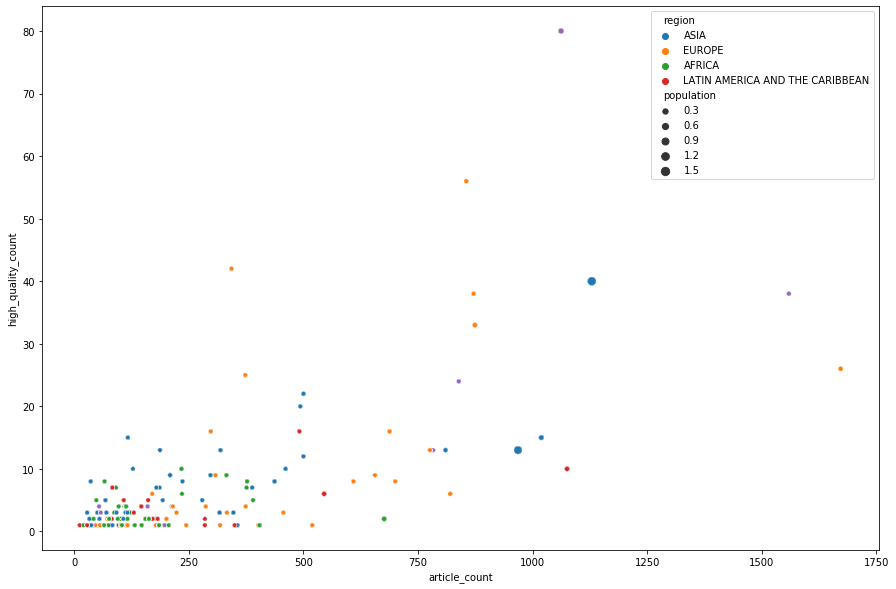

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

visualize = per_country[['country', 'article_count', 'high_quality_count', 'population']].merge(df[['country', 'region']], on='country').reset_index()

fig = plt.subplots(figsize=(15,10))
sns.scatterplot(data=visualize, x='article_count', y='high_quality_count', hue='region', size='population')
plt.show()

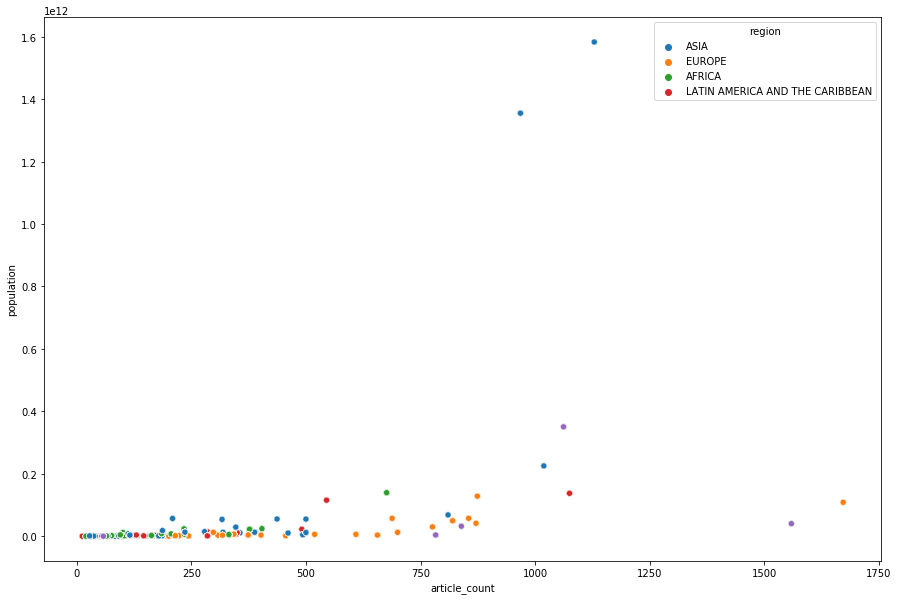

In [61]:
visualize = per_country[['country', 'article_count', 'population']].merge(df[['country', 'region']], on='country').reset_index()

fig = plt.subplots(figsize=(15,10))
sns.scatterplot(data=visualize, x="article_count", y="population", hue='region')
plt.show()

### Table 1: Top 10 countries by coverage

In [31]:
per_country[['country', 'proportion_to_pop', 'article_count', 'population']].sort_values(by='proportion_to_pop', ascending=False).head(10)

,country,proportion_to_pop,article_count,population
133,Tuvalu,0.000100,54,540000
33,Dominica,0.000014,12,864000
141,Vanuatu,0.000003,58,18618000
81,Martinique,0.000003,34,12104000
51,Iceland,0.000003,201,73968000
80,Malta,0.000002,101,52722000
78,Maldives,0.000002,83,44903000
122,Suriname,0.000002,40,24200000
86,Montenegro,0.000002,72,44784000
74,Luxembourg,0.000002,178,112496000


### Table 2: Bottom 10 countries by coverage

In [32]:
per_country[['country', 'proportion_to_pop', 'article_count', 'population']].sort_values(by='proportion_to_pop', ascending=True).head(10)

,country,proportion_to_pop,article_count,population
26,China,7.130709e-10,1129,1583292665000
52,India,7.142347e-10,968,1355296800000
138,United States,3.031424e-09,1062,350330436000
53,Indonesia,3.680002e-09,209,56793451000
96,Pakistan,4.526116e-09,1019,225137860000
16,Brazil,4.721168e-09,545,115437540000
94,Nigeria,4.851072e-09,676,139350640000
8,Bangladesh,5.888969e-09,317,53829453000
107,Russia,6.815100e-09,874,128244642000
84,Mexico,7.825216e-09,1075,137376400000


### Table 3: Top 10 countries by relative quality

In [33]:
per_country[['country', 'proportion_high_quality', 'high_quality_count', 'article_count']].sort_values(by='proportion_high_quality', ascending=False).head(10)

,country,proportion_high_quality,high_quality_count,article_count
63,"Korea, North",0.222222,8,36
109,Saudi Arabia,0.128205,15,117
106,Romania,0.122449,42,343
23,Central African Republic,0.121212,8,66
140,Uzbekistan,0.107143,3,28
82,Mauritania,0.104167,5,48
46,Guatemala,0.084337,7,83
33,Dominica,0.083333,1,12
125,Syria,0.078125,10,128
11,Benin,0.076923,7,91


### Table 4: Bottom 10 countries by relative quality

In [34]:
per_country[['country', 'proportion_high_quality', 'high_quality_count', 'article_count']].sort_values(by='proportion_high_quality', ascending=True).head(10)

,country,proportion_high_quality,high_quality_count,article_count
10,Belgium,0.001927,1,519
128,Tanzania,0.002475,1,404
124,Switzerland,0.002488,1,402
89,Nepal,0.002809,1,356
101,Peru,0.002857,1,350
94,Nigeria,0.002959,2,676
104,Portugal,0.003145,1,318
27,Colombia,0.003509,1,285
73,Lithuania,0.004098,1,244
87,Morocco,0.004854,1,206


### Table 5: Geographic regions ranked by coverage

In [35]:
all_regions[['region', 'proportion_to_pop', 'article_count', 'population']].sort_values(by='proportion_to_pop', ascending=False)

,region,proportion_to_pop,article_count,population
0,CARIBBEAN,1.461544e-07,695,4755245000
6,MIDDLE AFRICA,7.249258e-08,665,9173353000
2,CENTRAL ASIA,7.160784e-08,245,3421413000
10,OCEANIA,6.829978e-08,3126,45768816000
9,NORTHERN EUROPE,5.184558e-08,3763,72580917000
17,WESTERN ASIA,4.166041e-08,2563,61521231000
15,SOUTHERN EUROPE,3.644702e-08,3710,101791590000
4,EASTERN AFRICA,2.873491e-08,2502,87071794000
3,EUROPE,2.854027e-08,15765,552377478000
14,SOUTHERN AFRICA,2.743824e-08,634,23106438000


### Table 6: Geographic regions ranked by relative quality

In [38]:
all_regions[['region', 'proportion_high_quality', 'high_quality_count', 'article_count']].sort_values(by='proportion_high_quality', ascending=False)

,region,proportion_high_quality,high_quality_count,article_count
8,NORTHERN AMERICA,0.054708,104,1901
13,SOUTHEAST ASIA,0.036139,73,2020
17,WESTERN ASIA,0.034725,89,2563
5,EASTERN EUROPE,0.031618,118,3732
3,EAST ASIA,0.030732,76,2473
2,CENTRAL ASIA,0.028571,7,245
9,NORTHERN EUROPE,0.027106,102,3763
2,ASIA,0.027085,316,11667
6,MIDDLE AFRICA,0.024060,16,665
3,EUROPE,0.022201,350,15765


# Writeup: Reflections and Implications

### Summary of learnings and findings

I was surprised that such a specific dataset as wikipedia articles of politicians by nationality existed. I was further intrigued to learn from the description of its creation that the structure of articles in wikipedia can be accessed as a tree and at varying depths. I'd be interested to learn more about the way their data is semantically structured.

I found the interaction of number of articles with population and high quality articles, respectively, quite interesting. Both in scatterplot form and table form it bears out that parts of Europe, Asia, Oceania, and North America stand out as having noticably higher proportions of high quality articles and quantities of articles. Sub-regions in Africa and Latin America and the Caribbean tend to remain near the bulk cluster of most other countries.

Overall population was not a clear indicator for number of articles, but number of articles did have a heteroscedastic correlation with count of high quality articles.  

### Responses to questions
1. What biases did you expect to find in the data (before you started working with it), and why?

Before getting into the data and under some reasonable assumptions that bias _may_ exist in the data, given the assignment, I came up with some potentially confounding variables for predictions of quality on politicians wikipedia pages world-wide that all stemmed from the role of _**relevance**_ in community driven forum such as Wikipedia.

- length of article, number of sections and citations 
    - these could correspond to thoroughness and amount of info available which may indicate a type of quality 
- number of edits and editors
    - a less developed page is less peer-reviewed and may reflect less interest by the community in general
- frequency of reference of that politician or country in english news sources
    - political happenings correspond to greater relevance and therefore interest in developing a quality page
- per capita GDP of the country
    - wealth could be a better proxy for greater significance on the world stage than population
- number of views / edits on that page that are from that politician's country 
    - less demand / involvement for english wikis in non-english speaking countries would mean the development and audience is primarily driven by relevance to the public of other countries
    
3. What might your results suggest about (English) Wikipedia as a data source?

English Wikipedia appears subject to the bias of interest from, relevance to, and attention of the English Wikipedia community. This could leave quality gaps with respect to subjects that are not considered important or interesting by a finite pool of contributors and an inherently skewed user base.

4. What might your results suggest about the internet and global society in general?

This could be taken as an example of how curation (increasingly automatable due to recommendation systems) can insulate groups from exposure to content and ideas outside of their perceived interests and over-expose them to that which they are predisposed. This can lead to a skewed sense of significance. In this case a bias towards featuring articles about familiar subjects with articles that are already well developed and likely well trafficked as opposed to potentially compelling, but more niche topics.